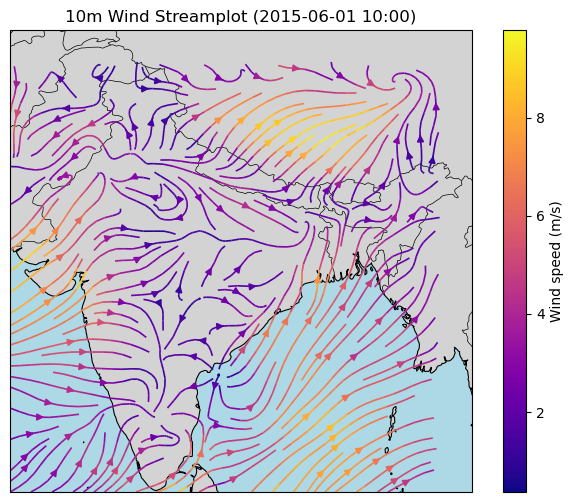

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load dataset
ds = xr.open_dataset("india_wind_data.nc")

# Pick a time
ds_t = ds.sel(valid_time='2015-06-01T10:00')
u = ds_t['u10'].values
v = ds_t['v10'].values
lats = ds['latitude'].values
lons = ds['longitude'].values

# Flip latitude if decreasing
if lats[0] > lats[-1]:
    lats = lats[::-1]
    u = u[::-1, :]
    v = v[::-1, :]

# Downsample to reduce clutter
skip = 6
u = u[::skip, ::skip]
v = v[::skip, ::skip]
lats_ds = lats[::skip]
lons_ds = lons[::skip]
lon2d, lat2d = np.meshgrid(lons_ds, lats_ds)

speed = np.sqrt(u**2 + v**2)

# Plot with Cartopy
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98, 8, 38], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', zorder=0)

# Streamplot
strm = ax.streamplot(
    lon2d, lat2d, u, v,
    color=speed,
    cmap='plasma',
    density=1.5,
    transform=ccrs.PlateCarree(),
    linewidth=1.2
)

# Colorbar
cb = plt.colorbar(strm.lines, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cb.set_label('Wind speed (m/s)')

plt.title('10m Wind Streamplot (2015-06-01 10:00)')
plt.show()
